In [1]:
import cv2
import matplotlib as plt
import numpy as np
%matplotlib inline

In [2]:
img = cv2.imread('picture/BullPoint.jpg')

In [3]:
# BGR cv2读取的内容 (1080, 1920, 3)
print(type(img), img.shape)

<class 'numpy.ndarray'> (1080, 1920, 3)


# 图像的显示

In [4]:
cv2.imshow("BullPoint", img)
# 等待时间，毫秒级，0表示任意键终止
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
def cv_show(img_name, image):
    cv2.imshow(img_name, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [6]:
cv_show('test', img)

# 只显示灰度图

In [7]:
# cv2.IMREAD_GRAYSCALE 只显示灰度图像
img_gray = cv2.imread('picture/BullPoint.jpg', cv2.IMREAD_GRAYSCALE)
img_gray.shape

(1080, 1920)

In [8]:
cv2.imshow("gray", img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 图像保存

In [9]:
cv2.imwrite("picture/BullPoint_gray.jpg", img_gray)

True

In [10]:
img_gray.size  # 像素点的个数

2073600

In [11]:
img_gray.dtype  # 类型

dtype('uint8')

# 视频读取

In [22]:
funny = cv2.VideoCapture('video/funny.MP4')

In [23]:
# 检查视频是否能够打开
if funny.isOpened():
    open, frame = funny.read()
else:
    open = False

In [24]:
while open:
    res, frame = funny.read()
    if frame is None:
        break
    if res:
        # convert color
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # cv2.COLOR_BGR2GRAY
        cv2.imshow('result', gray)
        if cv2.waitKey(10) % 0xFF == 27:
            break

funny.release()
cv2.destroyAllWindows()

# 截取部分图像数据

In [25]:
img = cv2.imread('picture/BullPoint.jpg')
res_img = img[:600, :600]
cv_show('part of the raw picture', res_img)

# 颜色通道提取

In [26]:
b, g, r = cv2.split(img)
b.shape

(1080, 1920)

In [27]:
# 组合通道
merge_img = cv2.merge((b, g, r))
merge_img.shape

(1080, 1920, 3)

In [28]:
# 只保留 R 通道
cur_img = merge_img.copy()
cur_img[:, :, 0] = 0
cur_img[:, :, 1] = 0
cv2.imshow('R channel', cur_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
# 只保留 G 通道
g_img = merge_img.copy()
g_img[:, :, 0] = 0
g_img[:, :, 2] = 0
cv2.imshow('G channel', g_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
# 只保留 B 通道
b_img = merge_img.copy()
b_img[:, :, 1] = 0
b_img[:, :, 2] = 0
cv2.imshow('B channel', b_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 边界填充

In [49]:
# 四周填充的长度
top_size, bottom_size, left_size, right_size = 150, 150, 150, 150
img = cv2.imread('picture/BullPoint.jpg')
img.shape

(1080, 1920, 3)

In [50]:
# 复制法， 复制最边缘的像素
replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
# 反射法 ： 对该兴趣的图像中的像素在两边进行复制 (反射长度为4).         dcba| abcdefgh |hgfe
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT)
# 反射法 101 ： edcb | abcdefgh | gfed
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT_101)
# 外包装法： abcd | abcdefgh | abcd
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_WRAP)
# 常量法， 用常数进行填充
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_CONSTANT, value=0)

(<AxesSubplot:title={'center':'constant'}>,
 Text(0.5, 1.0, 'constant'))

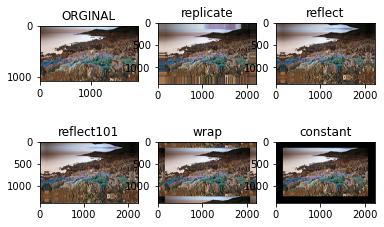

In [51]:
import matplotlib.pyplot as plt

plt.subplot(231), plt.imshow(img, 'gray'), plt.title('ORGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('replicate')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('reflect')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('reflect101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('wrap')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('constant')

(<matplotlib.image.AxesImage at 0x1e0579286d0>,
 Text(0.5, 1.0, 'constant: (1380, 2220, 3)'))

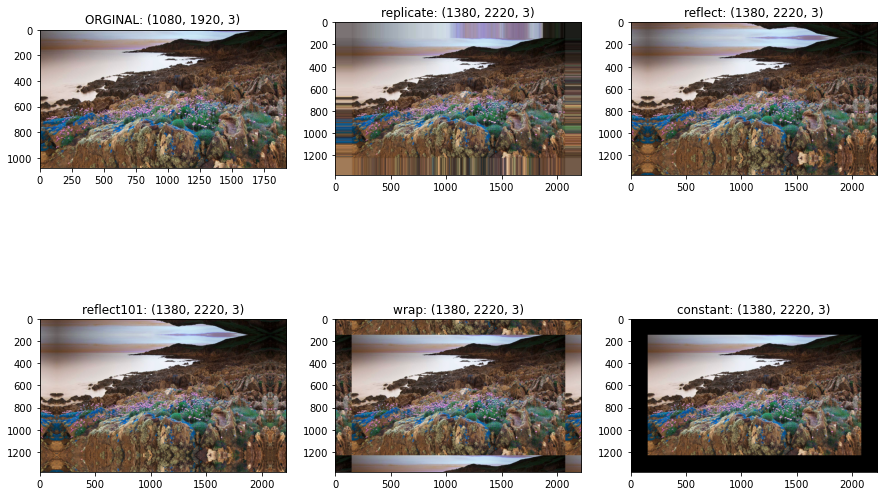

In [52]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(img, 'gray'), axes[0, 0].set_title('ORGINAL: {}'.format(img.shape))
axes[0, 1].imshow(replicate, 'gray'), axes[0, 1].set_title('replicate: {}'.format(replicate.shape))
axes[0, 2].imshow(reflect, 'gray'), axes[0, 2].set_title('reflect: {}'.format(reflect.shape))
axes[1, 0].imshow(reflect101, 'gray'), axes[1, 0].set_title('reflect101: {}'.format(reflect101.shape))
axes[1, 1].imshow(wrap, 'gray'), axes[1, 1].set_title('wrap: {}'.format(wrap.shape))
axes[1, 2].imshow(constant, 'gray'), axes[1, 2].set_title('constant: {}'.format(constant.shape))

# 数值计算

In [53]:
img = cv2.imread('picture/BullPoint.jpg')
img.shape

(1080, 1920, 3)

In [55]:
img[:, :5, 0]

array([[123, 119, 115, 114, 116],
       [118, 114, 110, 109, 112],
       [114, 109, 105, 105, 107],
       ...,
       [152, 149, 147, 145, 142],
       [144, 141, 138, 134, 133],
       [161, 158, 154, 147, 144]], dtype=uint8)

In [56]:
img_new = img + 10
img_new[:, :5, 0]

array([[133, 129, 125, 124, 126],
       [128, 124, 120, 119, 122],
       [124, 119, 115, 115, 117],
       ...,
       [162, 159, 157, 155, 152],
       [154, 151, 148, 144, 143],
       [171, 168, 164, 157, 154]], dtype=uint8)

In [58]:
# numpy 加法 溢出后会 % 256
res = img + img_new
res[:, :5, 0]

array([[  0, 248, 240, 238, 242],
       [246, 238, 230, 228, 234],
       [238, 228, 220, 220, 224],
       ...,
       [ 58,  52,  48,  44,  38],
       [ 42,  36,  30,  22,  20],
       [ 76,  70,  62,  48,  42]], dtype=uint8)

In [59]:
# cv2加法 溢出后 截断 最大保留255
cv2.add(img, img_new)[:, :5, 0]

array([[255, 248, 240, 238, 242],
       [246, 238, 230, 228, 234],
       [238, 228, 220, 220, 224],
       ...,
       [255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255]], dtype=uint8)

# 图像融合

In [61]:
img_1 = cv2.imread('picture/BullPoint.jpg')
img_2 = cv2.imread('picture/dog2.jpg')
print(img_1.shape, img_2.shape)

(1080, 1920, 3) (732, 1024, 3)


In [65]:
# !!!!! cv2 的 resize 只需要前两个维度，并且，维度顺序与正常维度相比是相反的
img_1_resize = cv2.resize(img_1, (1024, 732))
img_1_resize.shape

(732, 1024, 3)

In [66]:
# 0 是偏置项
res = cv2.addWeighted(img_1_resize, 0.6, img_2, 0.4, 0)
res.shape

(732, 1024, 3)

In [68]:
cv2.imshow('merge the picture', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

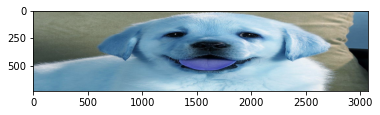

In [69]:
# 不指定具体size, 针对原始图像进行拉伸
res = cv2.resize(img_2, (0, 0), fx=3, fy=1)
plt.imshow(res)

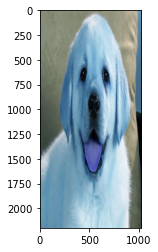

In [70]:
res = cv2.resize(img_2, (0, 0), fx=1, fy=3)
plt.imshow(res)